# Ball Detection

In [1]:
# Imports
%pip install opencv-python torch ultralytics numpy scikit-learn matplotlib

import cv2
import torch
import numpy as np
from sklearn.cluster import KMeans
from ultralytics import YOLO
import matplotlib.pyplot as plt
import torch

Note: you may need to restart the kernel to use updated packages.


# Uniform Color Filtering

**Use Uniform Color Filtering (Team Segmentation):**

- After detecting all humans using YOLOv8n, apply color-based segmentation on their jerseys.
- Use HVS color space to detect dominant jersey colors.
- Cluster similar colors using K-means to separate two teams.

## Detect Ball Using Hough Circle Transform

In [2]:
# Constants
IMAGE_PATH = "../test_image.png"

In [3]:
# Load a pre-trained YOLOv8 model
model = YOLO("yolov8n.pt")

# Define the classes you're interested in (balls are typically class 32 in COCO dataset)
ball_class_id = 32  # For standard COCO-trained models (sports ball)


0: 512x640 20 persons, 2 chairs, 78.8ms
Speed: 4.6ms preprocess, 78.8ms inference, 8.5ms postprocess per image at shape (1, 3, 512, 640)


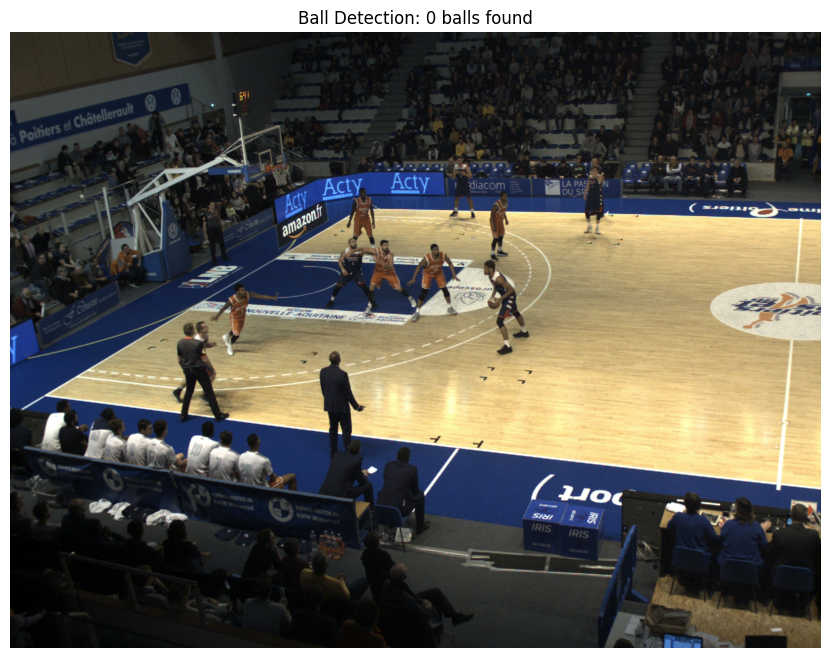

In [4]:
def detect_ball(image_path):
    # Load image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    # Run inference
    results = model(img_rgb)

    # Process results
    detections = []
    for r in results:
        boxes = r.boxes
        for box in boxes:
            # If using standard model, filter for ball class
            if box.cls[0].item() == ball_class_id:  # For pre-trained model
            # OR if using custom model with only balls:
            # if True:
                x1, y1, x2, y2 = box.xyxy[0].cpu().numpy().astype(int)
                conf = box.conf[0].item()

                # Calculate center and radius
                center_x = (x1 + x2) // 2
                center_y = (y1 + y2) // 2
                radius = max((x2 - x1), (y2 - y1)) // 2

                detections.append({
                    'center': (center_x, center_y),
                    'radius': radius,
                    'confidence': conf
                })

    # Visualize results
    img_result = img_rgb.copy()
    for det in detections:
        cv2.circle(img_result, det['center'], det['radius'], (0, 255, 0), 2)

    plt.figure(figsize=(12, 8))
    plt.imshow(img_result)
    plt.title(f"Ball Detection: {len(detections)} balls found")
    plt.axis('off')
    plt.show()

    return detections

# Example usage
detections = detect_ball('../results/ball-detection/ball_image.png')